In [296]:
import numpy as np
import matplotlib.pyplot as plt

from copy import deepcopy
from imageio.simpleitk_reader_writer import SimpleITKIO
from curve_util import find_largest_component, extract_skeleton, find_longest_path

seg_path = "Z:/data2/jwkong/nnunet_dataset/nnUNet_raw/Dataset007_Skull/labelsTr/case_0555.nii.gz"
sitkio = SimpleITKIO()
seg_data, properties = sitkio.read_seg(seg_fname = seg_path)
seg_data = np.squeeze(seg_data)
maxilla_data = deepcopy(seg_data)
mandible_data = deepcopy(seg_data)

In [297]:
total_length = seg_data.shape[0] * properties['spacing'][0]
if total_length >=130:
    top = 280
    middle = 340
    bottom = 400    

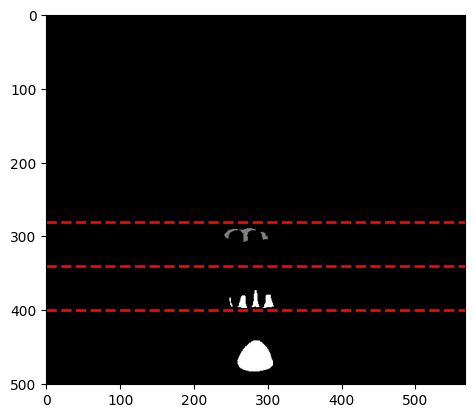

In [298]:
tr_data = np.transpose(seg_data, (1,0,2))
plt.imshow(tr_data[120],'gray')
plt.axhline(top, 0, 1, color='red', linestyle='--', linewidth=2)
plt.axhline(middle, 0, 1, color='red', linestyle='--', linewidth=2)
plt.axhline(bottom, 0, 1, color='red', linestyle='--', linewidth=2)

In [299]:

maxilla_data[maxilla_data != 1] = 0
mandible_data[mandible_data != 2] = 0
mandible_data[mandible_data == 2] = 1

maxilla_data = maxilla_data[top: middle]
mandible_data = mandible_data[middle:bottom]

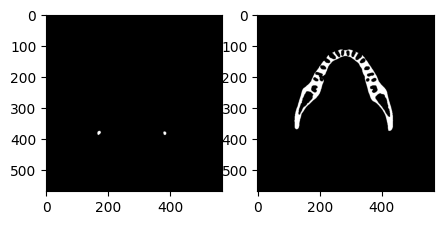

In [300]:
fig, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(maxilla_data[50], 'gray')
ax[1].imshow(mandible_data[50], 'gray')

In [301]:
maxilla_image = np.max(maxilla_data, axis=0)
maxilla_mask = np.zeros_like(maxilla_image, dtype=np.float32)
maxilla_mask[:400] = maxilla_image[:400]

mandible_mask = np.max(mandible_data, axis=0)

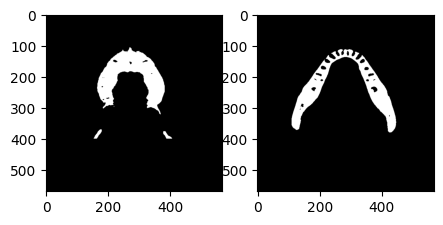

In [302]:
fig, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(maxilla_mask, 'gray')
ax[1].imshow(mandible_mask, 'gray')

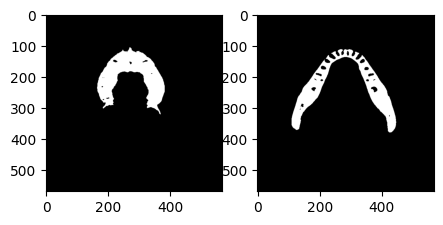

In [303]:
maxilla_result, _ = find_largest_component(maxilla_mask)
mandible_result, _ = find_largest_component(mandible_mask)

fig, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(maxilla_result, 'gray')
ax[1].imshow(mandible_result, 'gray')

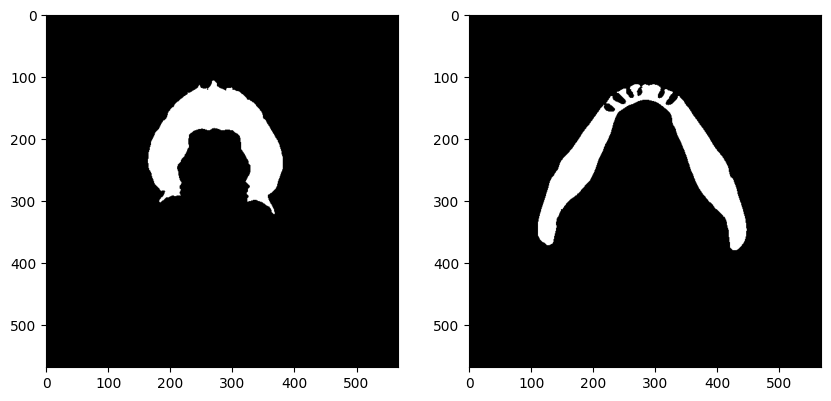

In [304]:
import scipy.ndimage as ndi
maxilla_fill = ndi.binary_fill_holes(maxilla_result).astype(dtype=np.uint8)
mandible_fill = ndi.binary_fill_holes(mandible_result).astype(dtype=np.uint8)

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(maxilla_fill, 'gray')
ax[1].imshow(mandible_fill, 'gray')

In [305]:
from skimage.morphology import closing, disk
closed_maxilla= closing(maxilla_fill, disk(7))
closed_mandible = closing(mandible_fill, disk(7))

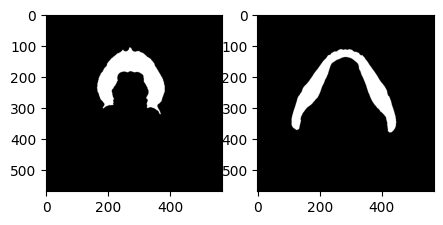

In [306]:
fig, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(closed_maxilla, "gray")
ax[1].imshow(closed_mandible, "gray")

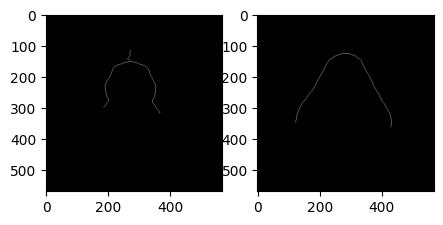

In [307]:
maxilla_skeleton = extract_skeleton(closed_maxilla)
mandible_skeleton = extract_skeleton(closed_mandible)

fig, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(maxilla_skeleton, "gray")
ax[1].imshow(mandible_skeleton, "gray")

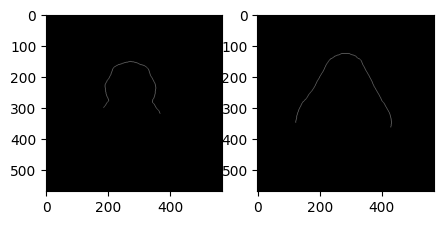

In [308]:
maxiila_curve = find_longest_path(maxilla_skeleton)
mandible_curve = find_longest_path(mandible_skeleton)

fig, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(maxiila_curve, "gray")
ax[1].imshow(mandible_curve, "gray")